In [19]:
# Importando Bibliotecas
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import plotly.express as px
import folium

In [20]:
df_raw = pd.read_csv('dataset/zomato.csv')

## Limpando Dados

In [21]:
# Criando Funções:

COUNTRIES = {
1: "India",
14: "Australia",
30: "Brazil",
37: "Canada",
94: "Indonesia",
148: "New Zeland",
162: "Philippines",
166: "Qatar",
184: "Singapure",
189: "South Africa",
191: "Sri Lanka",
208: "Turkey",
214: "United Arab Emirates",
215: "England",
216: "United States of America",
}

def Country_Name(country_id):
    return COUNTRIES[country_id]


# -----------------------------------------------


def create_price_tye(price_range):
    if price_range == 1:
        return "cheap"
    elif price_range == 2:
        return "normal"
    elif price_range == 3:
        return "expensive"
    else:
        return "gourmet"
    
    
# -----------------------------------------------

COLORS = {
"3F7E00": "darkgreen",
"5BA829": "green",
"9ACD32": "lightgreen",
"CDD614": "orange",
"FFBA00": "red",
"CBCBC8": "darkred",
"FF7800": "darkred",
}
def color_name(color_code):
    return COLORS[color_code]

# -----------------------------------------------

def rename_columns(dataframe):
    df = dataframe.copy()
    title = lambda x: inflection.titleize(x)
    snakecase = lambda x: inflection.underscore(x)
    spaces = lambda x: x.replace(" ", "")
    cols_old = list(df1.columns)
    cols_old = list(map(title, cols_old))
    cols_old = list(map(spaces, cols_old))
    cols_new = list(map(snakecase, cols_old))
    df1.columns = cols_new
    return df

In [22]:
df = df_raw.copy()

# Removendo linhas 'NaN'

df = df.dropna(subset=['Restaurant ID'])
df = df.dropna(subset=['Restaurant Name'])
df = df.dropna(subset=['Cuisines'])
df = df.dropna(subset=['Country Code'])
df = df.dropna(subset=['Address'])
df = df.dropna(subset=['Locality'])
df = df.dropna(subset=['Locality Verbose'])
df = df.dropna(subset=['Longitude'])
df = df.dropna(subset=['Average Cost for two'])
df = df.dropna(subset=['Has Table booking'])
df = df.dropna(subset=['Has Online delivery'])
df = df.dropna(subset=['Price range'])
df = df.dropna(subset=['Aggregate rating'])
df = df.dropna(subset=['Rating color'])
df = df.dropna(subset=['Votes'])
df = df.dropna(subset=['City'])
#df = df.dropna(subset=['City'])

df = df.dropna( )

# Removendo linhas duplicadas
df = df.drop_duplicates()

df = df.drop(columns = ['Switch to order menu'], axis=1)

# Define categorias de preço de acordo com o range
df['Price range'] = df['Price range'].apply(create_price_tye)

# Define o padrão de cores das avaliações
df['Rating color'] = df['Rating color'].apply(color_name)

# --------------------------------------------------------

df['Country Name'] = df['Country Code'].map(Country_Name)
# Definisdo os restaurantes po apenas um tipo de culinaria
df["Cuisines"] = df.loc[:, "Cuisines"].astype(str).apply(lambda x: x.split(",")[0])

# df.info() #valores nulos
#print(df.isnull())
# print(df.isna())

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6929 entries, 0 to 7526
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         6929 non-null   int64  
 1   Restaurant Name       6929 non-null   object 
 2   Country Code          6929 non-null   int64  
 3   City                  6929 non-null   object 
 4   Address               6929 non-null   object 
 5   Locality              6929 non-null   object 
 6   Locality Verbose      6929 non-null   object 
 7   Longitude             6929 non-null   float64
 8   Latitude              6929 non-null   float64
 9   Cuisines              6929 non-null   object 
 10  Average Cost for two  6929 non-null   int64  
 11  Currency              6929 non-null   object 
 12  Has Table booking     6929 non-null   int64  
 13  Has Online delivery   6929 non-null   int64  
 14  Is delivering now     6929 non-null   int64  
 15  Price range          

## Visão País

In [24]:
df1 = df.copy()
df1 = df1.dropna(subset=['Country Name'])

In [25]:
# df1 = df1.drop('index', axis=1) # Remove index

### 1. Qual o nome do país que possui mais cidades registradas?

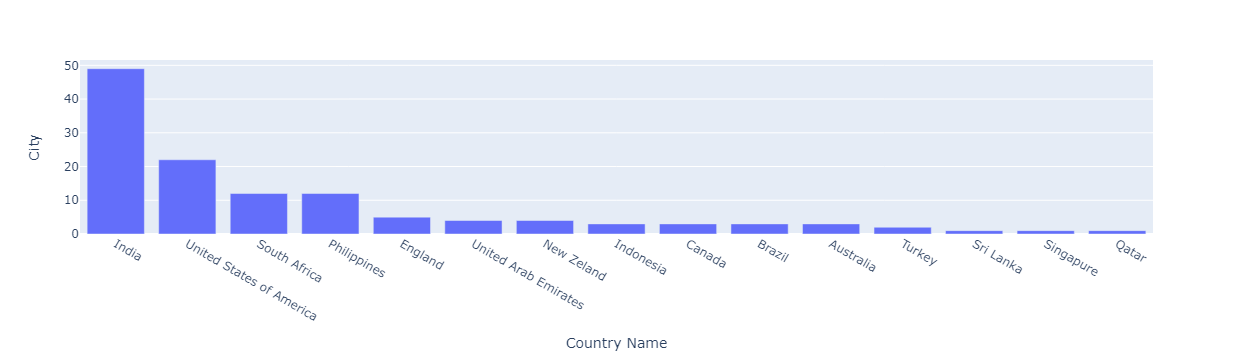

In [26]:
df2 = df1.loc[:, ['City', 'Country Name']].groupby('Country Name').nunique().sort_values(['City', 'Country Name'],ascending = False).reset_index()
px.bar(df2, x = 'Country Name', y = 'City')

### 2. Qual o nome do país que possui mais restaurantes registrados?

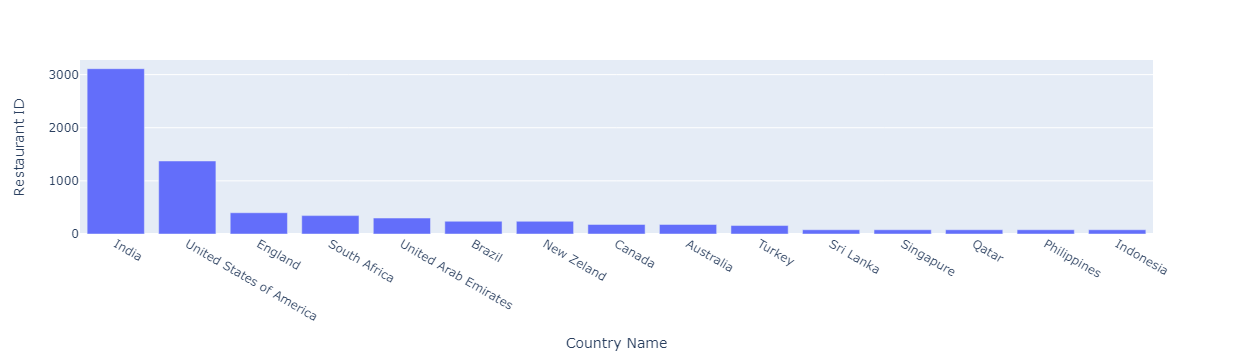

In [27]:
df3 = df1.loc[:, ['Restaurant ID', 'Country Name']].groupby('Country Name').count().sort_values(['Restaurant ID', 'Country Name'],ascending = False).reset_index()
px.bar(df3, x = 'Country Name', y = 'Restaurant ID')

### 3. Qual o nome do país que possui mais restaurantes com o nível de preço igual a 4 registrados?

In [28]:
valor = df1.loc[:, ['Price range', 'Restaurant ID', 'Country Name' ]].groupby('Country Name').count().sort_values(['Restaurant ID'], ascending = False).reset_index().iloc[0, 0]
print(f'O nome do país que possui mais restaurantes com o nível de preço igual a 4 registrados é {valor}')

O nome do país que possui mais restaurantes com o nível de preço igual a 4 registrados é India


### 4. Qual o nome do país que possui a maior quantidade de tipos de culinária distintos?

In [29]:
df2 = df1.loc[:, ['Cuisines', 'Country Name' ]].groupby('Country Name').nunique().sort_values(['Cuisines'], ascending = False).reset_index()
valor = df2.loc[0, ['Country Name',	'Cuisines']][0]
valor2 = df2.loc[0, ['Country Name',	'Cuisines']][1]
print( f'O nome do país que possui a maior quantidade de tipos de culinária distintos é {valor} com {valor2} no total' )

O nome do país que possui a maior quantidade de tipos de culinária distintos é India com 77 no total


### 5. Qual o nome do país que possui a maior quantidade de avaliações feitas?

In [30]:
valor = df1.loc[:, ['Votes', 'Country Name' ]].groupby('Country Name').count().sort_values(['Votes'], ascending = False).reset_index().iloc[0, 0]
print( f'O nome do país que possui a maior quantidade de avaliações feitas é {valor}' )

O nome do país que possui a maior quantidade de avaliações feitas é India


### 6. Qual o nome do país que possui a maior quantidade de restaurantes que fazem entrega?

In [31]:
valor = df1.loc[df1['Is delivering now'] == 1, ['Restaurant ID', 'Country Name']].groupby('Country Name').count().sort_values(['Restaurant ID'], ascending = False).reset_index().iloc[0, 0]
print(f'O nome do país que possui a maior quantidade de restaurantes que fazem entrega é {valor}')

O nome do país que possui a maior quantidade de restaurantes que fazem entrega é India


### 7. Qual o nome do país que possui a maior quantidade de restaurantes que aceitam reservas?

In [32]:
valor = df1.loc[df1['Has Table booking'] == 1, ['Restaurant ID', 'Country Name']].groupby('Country Name').count().sort_values(['Restaurant ID'], ascending = False).reset_index().iloc[0, 0]
print(f'O nome do país que possui a maior quantidade de restaurantes que aceitam reservas é {valor}')

O nome do país que possui a maior quantidade de restaurantes que aceitam reservas é India


 ### 8. Qual o nome do país que possui, na média, a maior quantidade de avaliações registrada?

In [33]:
valor = df1.loc[:, ['Votes', 'Country Name']].groupby('Country Name').mean().sort_values(['Votes'], ascending = False).reset_index().iloc[0, 0]
print(f'O nome do país que possui, na média, a maior quantidade de avaliações registradas é {valor}')

O nome do país que possui, na média, a maior quantidade de avaliações registradas é Indonesia


 ### 9. Qual o nome do país que possui, na média, a maior nota média registrada?

In [34]:
valor = df1.loc[:, ['Votes', 'Country Name']].groupby('Country Name').mean().sort_values(['Votes'], ascending = False).reset_index().iloc[0, 0]
print(f'O nome do país que possui, na média, a maior nota média registrada é {valor}')

O nome do país que possui, na média, a maior nota média registrada é Indonesia


### 10. Qual o nome do país que possui, na média, a menor nota média registrada?

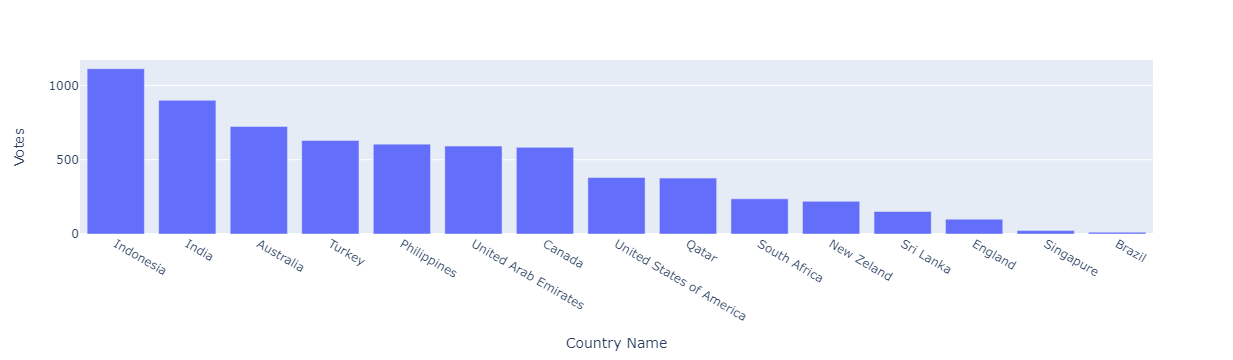

In [35]:
df2 = df1.loc[:, ['Votes', 'Country Name']].groupby('Country Name').mean().sort_values(['Votes'], ascending = False).reset_index()
px.bar(df2, x = 'Country Name', y = 'Votes')

### 11. Qual a média de preço de um prato para dois por país?

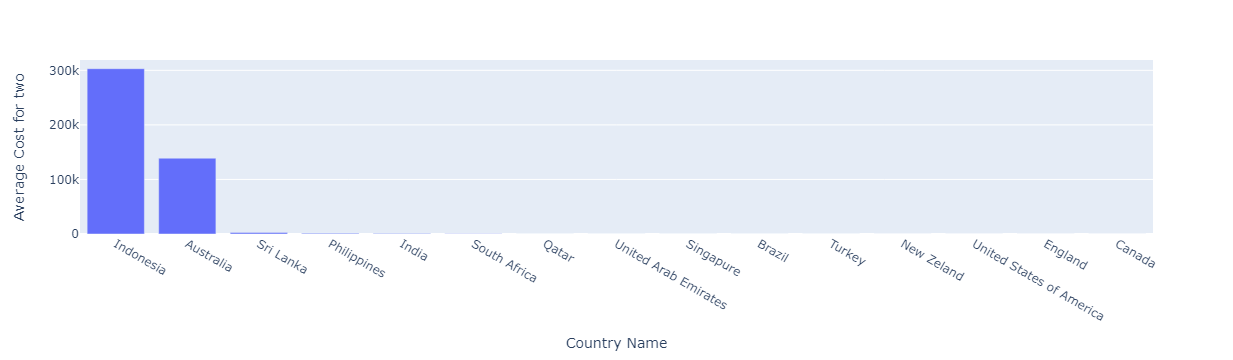

In [36]:
df2 = df1.loc[:, ['Average Cost for two', 'Country Name']].groupby('Country Name').mean().sort_values(['Average Cost for two'], ascending = False).reset_index()
px.bar(df2, x = 'Country Name', y = 'Average Cost for two' )